In [1]:
import numpy as np
from scipy.ndimage import gaussian_filter1d

from one.api import ONE
one = ONE()
brain_acronym = 'VISp'

# query sessions endpoint
sessions = one.search(atlas_acronym=brain_acronym, query_type='remote')
print(f'No. of detected sessions: {len(sessions)}\n')

# Print the first 5 eids
from pprint import pprint  # Print larger lists more clearly
pprint(sessions[:5])

eid = '0cf6d255-8f2f-463e-84fb-c54bacb79f51'
pids, labels = one.eid2pid(eid)
for pid, name in zip(pids, labels):
  print(f'pid: {pid}, pname: {name}')
pid = 'c5b9e063-f640-4936-b851-f7602cb6659b'
eid, pname = one.pid2eid(pid)

trials = one.load_object(eid, 'trials')
print('keys of trials : ', list(trials.keys()))

from IPython.display import display # import module to display dataframe nicely
trials_df = trials.to_df()
display(trials_df)

No. of detected sessions: 73

['5ae68c54-2897-4d3a-8120-426150704385',
 '6899a67d-2e53-4215-a52a-c7021b5da5d4',
 'ca4ecb4c-4b60-4723-9b9e-2c54a6290a53',
 '7dd27c2f-9544-448d-918d-be0f9837b0e0',
 'caa5dddc-9290-4e27-9f5e-575ba3598614']
pid: c5b9e063-f640-4936-b851-f7602cb6659b, pname: probe00
keys of trials :  ['goCueTrigger_times', 'stimOff_times', 'goCue_times', 'response_times', 'choice', 'stimOn_times', 'contrastLeft', 'contrastRight', 'probabilityLeft', 'feedback_times', 'feedbackType', 'rewardVolume', 'firstMovement_times', 'intervals']


,goCueTrigger_times,stimOff_times,goCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,probabilityLeft,feedback_times,feedbackType,rewardVolume,firstMovement_times,intervals_0,intervals_1
0,52.414596,53.971169,52.415391,52.923494,-1.0,52.487851,NaN,0.2500,0.5,52.923574,1.0,1.5,52.738333,49.629703,54.471192
1,57.927887,59.387694,57.928707,58.343287,1.0,57.927673,1.0,NaN,0.5,58.343365,1.0,1.5,58.058333,55.109389,59.887788
2,61.144085,62.444222,61.144918,61.399885,1.0,61.143918,1.0,NaN,0.5,61.399959,1.0,1.5,61.184333,60.471986,62.944286
3,65.120969,66.454121,65.121854,65.408566,-1.0,65.120754,NaN,1.0000,0.5,65.408658,1.0,1.5,65.232333,63.490984,66.954154
4,70.094346,71.477418,70.095123,70.421045,-1.0,70.094223,NaN,0.0625,0.5,70.421157,1.0,1.5,70.248333,67.521247,71.977446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,2717.450312,2719.210652,2717.451061,2718.157211,1.0,2717.450128,1.0,NaN,0.2,2718.157324,1.0,1.5,2717.912333,2716.934813,2719.710710
698,2720.900007,2725.843588,2720.900649,2724.788208,-1.0,2720.899883,NaN,1.0000,0.2,2724.788294,1.0,1.5,2724.456333,2720.321607,2726.343610
699,2727.717408,2729.210252,2727.718234,2728.150708,-1.0,2727.717268,NaN,1.0000,0.2,2728.150791,1.0,1.5,2727.854333,2726.980408,2729.710310
700,2731.050403,2733.866019,2731.051168,2732.810190,-1.0,2731.050268,NaN,1.0000,0.2,2732.810292,1.0,1.5,2732.496333,2730.314708,2734.366081




---


⚡ **INFORMATION:** Most datasets are also described in this [Google Document](https://docs.google.com/document/d/1OqIqqakPakHXRAwceYLwFY9gOrm8_P62XIfCTnHwstg/edit#heading=h.hnjqyfnroyya)


---



### Characterising the electrophysiology data of a single insertion

In [2]:
# 1. Load in spikesorting data for pid
from brainbox.io.one import SpikeSortingLoader
from iblatlas.atlas import AllenAtlas

ba = AllenAtlas()

ssl = SpikeSortingLoader(one=one, pid=pid, atlas=ba)
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)

# 2. Evaluate the number of good clusters - those with a label of 1
good_cluster_idx = clusters['label'] == 1
clusters_good = {key:val[good_cluster_idx] for key, val in clusters.items()}

all_clusters = clusters['label'].shape
good_clusters = clusters_good['label'].shape
print(f'Total no. of clusters: {all_clusters}')
print(f'Number of good clusters: {good_clusters}')

# 3. Find the location of clusters in brain
# The location of the clusters can be found in the atlas_id (Allen CCF ids) or acronym attributes of the clusters object
acronyms = clusters_good['acronym']
unique_acronyms, count = np.unique(acronyms, return_counts=True)
for a, c in zip(unique_acronyms, count):
  print(f'{a}: {c}')

c:\Users\stell\anaconda3\envs\iblenv\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)
c:\Users\stell\anaconda3\envs\iblenv\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


Total no. of clusters: (552,)
Number of good clusters: (60,)
CA1: 7
DG-mo: 8
DG-po: 5
DG-sg: 12
MB: 1
MGd: 2
MGv: 4
PIL: 3
PP: 3
VISp2/3: 2
VISp4: 2
VISp5: 3
VISp6a: 5
VISp6b: 2
or: 1


C:\Users\stell\AppData\Local\Temp\ipykernel_29060\2831819201.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
C:\Users\stell\AppData\Local\Temp\ipykernel_29060\2831819201.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))


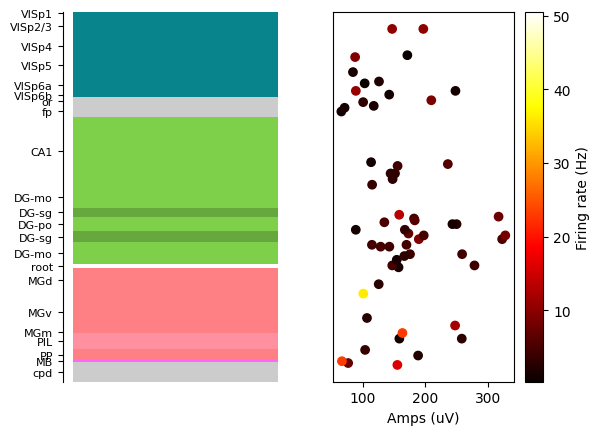

In [3]:
# 5. Plot firing rate and brain locations
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from brainbox.ephys_plots import plot_brain_regions
clusters_good.keys()

# 4. Compute the firing rate of each cluster - access it from the clusters object
firing_rate = clusters_good['firing_rate']

norm = colors.Normalize(vmin=np.min(firing_rate), vmax=np.max(firing_rate), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
firing_rate_cols = mapper.to_rgba(firing_rate)

fig, axs = plt.subplots(1, 2)
# Plot the brain regions through which the channels on the insertion pass
plot_brain_regions(channels['atlas_id'], channel_depths=channels['axial_um'], ax=axs[0])
# Plot scatter plot of cluster depths vs cluster amp with firing rate encoded in colour
# Map firing rate values to colours
norm = colors.Normalize(vmin=np.min(firing_rate), vmax=np.max(firing_rate), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
firing_rate_cols = mapper.to_rgba(firing_rate)
axs[1].scatter(clusters_good['amp_median'] * 1e6, clusters_good['depths'], c=firing_rate_cols)
axs[1].set_xlabel('Amps (uV)')
axs[1].get_yaxis().set_visible(False)
# Add colorbar
cbar = fig.colorbar(mapper, ax=axs[1])
cbar.set_label('Firing rate (Hz)')

### PSTH

In [4]:
# 1. Load in trials data and spikesorting data
from brainbox.io.one import SessionLoader, SpikeSortingLoader
from one.api import ONE
from iblatlas.atlas import AllenAtlas
import numpy as np

ba = AllenAtlas()
one = ONE()
pid = '92822789-608f-44a6-ad64-fe549402b2df'
# pid = 'c5b9e063-f640-4936-b851-f7602cb6659b'
eid, _ = one.pid2eid(pid)

sl = SessionLoader(eid=eid, one=one)
sl.load_trials()

ssl = SpikeSortingLoader(one=one, pid=pid, atlas=ba)
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)

# 2. Get spikes for a single cluster
# Get the 3th good cluster
region_str = 'VISp6a'
good_label = 1

region_mask = (clusters['acronym'] == region_str)
good_mask = (clusters['label'] == good_label)

selected_mask = region_mask & good_mask
selected_cluster_ids = np.where(selected_mask)[0]

# 3. Compute firing rate of cluster around trial event and plot as a raster
# Find times when stimulus appears
events = sl.trials['stimOn_times'].values  # 또는 .to_numpy()

from brainbox.singlecell import bin_spikes
# Compute number of spikes in 0.05s bins between 0.5s before stimulus presentation to 1s after stimulus presentation
bin_size = 0.05
pre_time = 1
post_time = 3

print('trial number: ', len(sl.trials))
print('good_cluster number: ', len(selected_cluster_ids))

c:\Users\stell\anaconda3\envs\iblenv\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)
c:\Users\stell\anaconda3\envs\iblenv\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


trial number:  620
good_cluster number:  5


#### 특정 뉴런(ex: cluster_id = 3)에 대한 PSTH 시각화 (trial 방향으로 평균)

Text(0.5, 1.0, 'Right Stimulus')

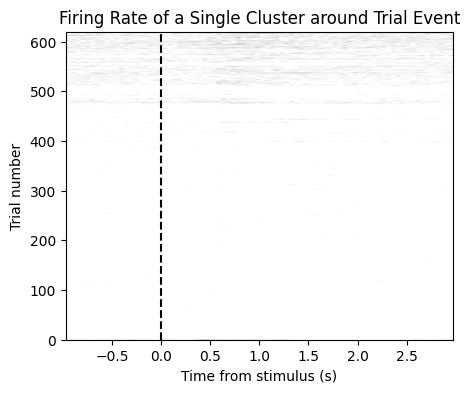

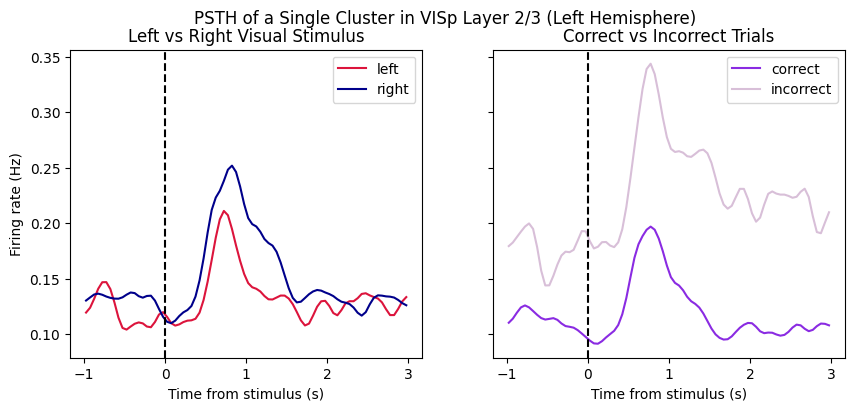

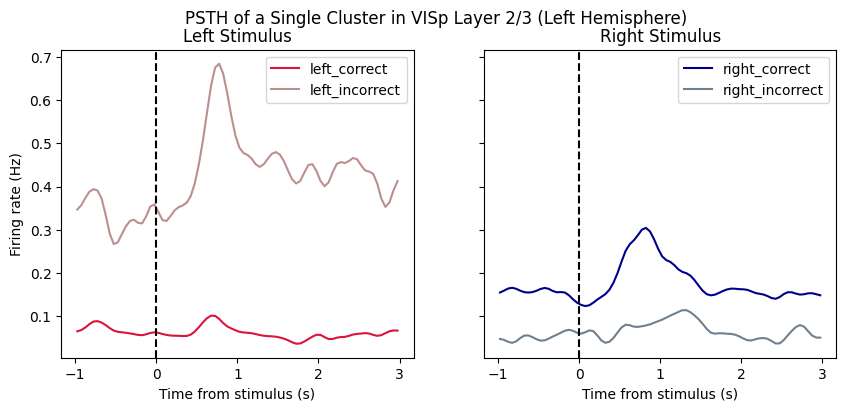

In [5]:
cluster_id = selected_cluster_ids[3]
spikes_idx = spikes['clusters'] == cluster_id # Get the index of the spikes object for the chosen cluster

spike_raster, times = bin_spikes(spikes.times[spikes_idx], events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
spikes_raster = spike_raster / bin_size

fig, ax = plt.subplots(figsize=(5, 4))
ax.imshow(spike_raster, extent=[times[0], times[-1], 0, events.size], origin='lower', cmap='binary', aspect='auto', vmax=20, vmin=0)
ax.axvline(0, c='k', linestyle='--')
ax.set_xlabel('Time from stimulus (s)')
ax.set_ylabel('Trial number')
ax.set_title(f'Firing Rate of a Single Cluster around Trial Event')

# 4. Compute peri stimulus time histogram for different trial events
# Compute psth for left vs right stimulus trials
left_idx = ~np.isnan(sl.trials['contrastLeft'])
right_idx = ~np.isnan(sl.trials['contrastRight'])
psth_left = np.nanmean(spike_raster[left_idx], axis=0)
psth_right = np.nanmean(spike_raster[right_idx], axis=0)

# Compute psth for correct vs incorrect trials
correct_idx = sl.trials['feedbackType'] == 1
incorrect_idx = sl.trials['feedbackType'] == -1
psth_correct = np.nanmean(spike_raster[correct_idx], axis=0)
psth_incorrect = np.nanmean(spike_raster[incorrect_idx], axis=0)

# Plot the psths
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
fig.suptitle('PSTH of a Single Cluster in VISp Layer 2/3 (Left Hemisphere)')
axs[0].plot(times, gaussian_filter1d(psth_left, sigma=1.5), c='crimson')
axs[0].plot(times, gaussian_filter1d(psth_right, sigma=1.5), c='darkblue')
axs[0].legend(['left', 'right'])
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus (s)')
axs[0].set_ylabel('Firing rate (Hz)')
axs[0].set_title('Left vs Right Visual Stimulus')

axs[1].plot(times, gaussian_filter1d(psth_correct, sigma=1.5), c='blueviolet')
axs[1].plot(times, gaussian_filter1d(psth_incorrect, sigma=1.5), c='thistle')
axs[1].legend(['correct', 'incorrect'])
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus (s)')
axs[1].set_title('Correct vs Incorrect Trials')

# 4. Compute peri stimulus time histogram for different trial events

left_correct_idx = left_idx & (sl.trials['feedbackType'] == 1)
left_incorrect_idx = left_idx & (sl.trials['feedbackType'] == -1)
psth_left_correct = np.nanmean(spike_raster[left_correct_idx], axis=0)
psth_left_incorrect = np.nanmean(spike_raster[left_incorrect_idx], axis=0)

right_correct_idx = right_idx & (sl.trials['feedbackType'] == 1)
right_incorrect_idx = right_idx & (sl.trials['feedbackType'] == -1)
psth_right_correct = np.nanmean(spike_raster[right_correct_idx], axis=0)
psth_right_incorrect = np.nanmean(spike_raster[right_incorrect_idx], axis=0)


# Plot the psths
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
fig.suptitle('PSTH of a Single Cluster in VISp Layer 2/3 (Left Hemisphere)')

axs[0].plot(times, gaussian_filter1d(psth_left_correct, sigma=1.5), c='crimson')
axs[0].plot(times, gaussian_filter1d(psth_left_incorrect, sigma=1.5), c='rosybrown')
axs[0].legend(['left_correct', 'left_incorrect'])
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus (s)')
axs[0].set_ylabel('Firing rate (Hz)')
axs[0].set_title('Left Stimulus')

axs[1].plot(times, gaussian_filter1d(psth_right_correct, sigma=1.5), c='darkblue')
axs[1].plot(times, gaussian_filter1d(psth_right_incorrect, sigma=1.5), c='slategray')
axs[1].legend(['right_correct', 'right_incorrect'])
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus (s)')
axs[1].set_title('Right Stimulus')

#### 모든 뉴런에 대한 PSTH(=뉴런 & trial 방향에 대해 평균)

spike_raster_all shape:  (5, 620, 80)
Left contrast:  [0.     0.0625 0.125  0.25   1.    ]


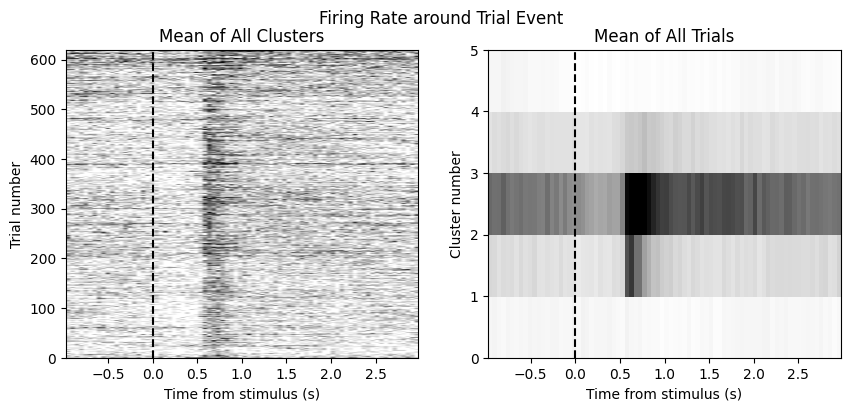

In [6]:
# spike_raster_all의 shape = (N_클러스터, N_trials, N_bins)
spike_raster_all = []
for cluster_id in selected_cluster_ids:
    spikes_idx = spikes['clusters'] == cluster_id
    spike_times_cluster = spikes['times'][spikes_idx]
    
    spike_raster, times = bin_spikes(
        spike_times_cluster, 
        events, 
        pre_time=pre_time, 
        post_time=post_time, 
        bin_size=bin_size
    )
    # Hz 단위로 변환 (count / bin_size)
    spike_raster_hz = spike_raster / bin_size
    spike_raster_all.append(spike_raster_hz)

# stack 후 shape를 살펴보면 (nClusters, nTrials, nBins)
spike_raster_all = np.stack(spike_raster_all, axis=0)
print('spike_raster_all shape: ', spike_raster_all.shape)

# (뉴런, trials) 양방향 평균 => PSTH (nBins,)
psth_all = np.nanmean(spike_raster_all, axis=(0,1))

# 5. PSTH 시각화
# 뉴런에 대해 평균
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Firing Rate around Trial Event')
axs[0].imshow(np.nanmean(spike_raster_all,axis=0), extent=[times[0], times[-1], 0, events.size], origin='lower', cmap='binary', aspect='auto', vmax=20, vmin=0)
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus (s)')
axs[0].set_ylabel('Trial number')
axs[0].set_title(f'Mean of All Clusters')

# trial에 대해 평균
axs[1].imshow(np.nanmean(spike_raster_all,axis=1), extent=[times[0], times[-1], 0, len(selected_cluster_ids)], origin='lower', cmap='binary', aspect='auto', vmax=20, vmin=0)
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus (s)')
axs[1].set_ylabel('Cluster number')
axs[1].set_title(f'Mean of All Trials')

left_idx = ~np.isnan(sl.trials['contrastLeft'])
right_idx = ~np.isnan(sl.trials['contrastRight'])

print('Left contrast: ', np.unique(sl.trials['contrastRight'][right_idx]))

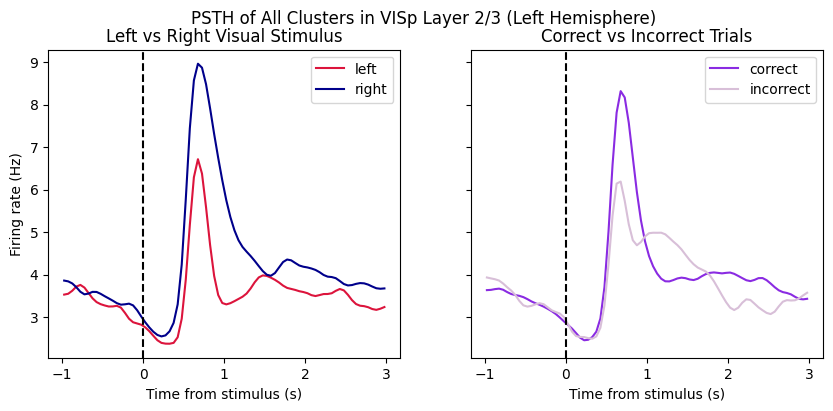

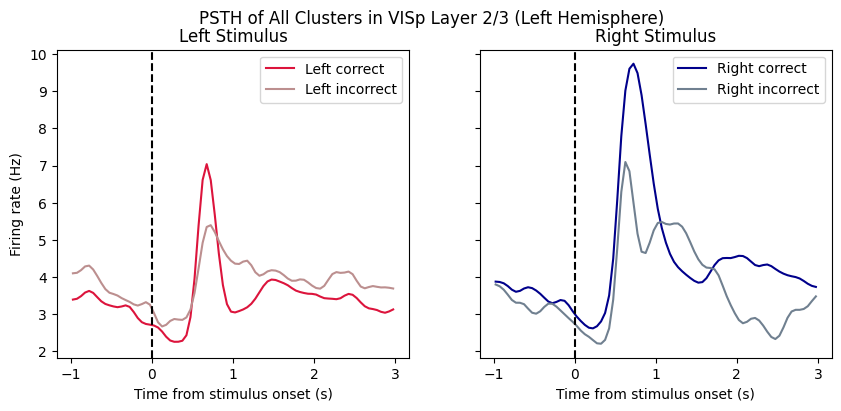

In [7]:
correct_idx = sl.trials['feedbackType'] == 1
incorrect_idx = sl.trials['feedbackType'] == -1
left_correct_idx = left_idx & (sl.trials['feedbackType'] == 1)
left_incorrect_idx = left_idx & (sl.trials['feedbackType'] == -1)
right_correct_idx = right_idx & (sl.trials['feedbackType'] == 1)
right_incorrect_idx = right_idx & (sl.trials['feedbackType'] == -1)

# left/right trial PSTH: (selected 클러스터 전부, left/right trial만 골라서) 평균
psth_left = np.nanmean(spike_raster_all[:, left_idx, :], axis=(0,1))
psth_right = np.nanmean(spike_raster_all[:, right_idx, :], axis=(0,1))
# correct/incorrect trial PSTH: (selected 클러스터 전부, correct/incorrect trial만 골라서) 평균
psth_correct = np.nanmean(spike_raster_all[:, correct_idx, :], axis=(0,1))
psth_incorrect = np.nanmean(spike_raster_all[:, incorrect_idx, :], axis=(0,1))

# Plot the psths
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
fig.suptitle('PSTH of All Clusters in VISp Layer 2/3 (Left Hemisphere)')
axs[0].plot(times, gaussian_filter1d(psth_left, sigma=1.5), c='crimson')
axs[0].plot(times, gaussian_filter1d(psth_right, sigma=1.5), c='darkblue')
axs[0].legend(['left', 'right'])
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus (s)')
axs[0].set_ylabel('Firing rate (Hz)')
axs[0].set_title('Left vs Right Visual Stimulus')

axs[1].plot(times, gaussian_filter1d(psth_correct, sigma=1.5), c='blueviolet')
axs[1].plot(times, gaussian_filter1d(psth_incorrect, sigma=1.5), c='thistle')
axs[1].legend(['correct', 'incorrect'])
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus (s)')
axs[1].set_title('Correct vs Incorrect Trials')

# left correct vs incorrect
psth_left_correct = np.nanmean(spike_raster_all[:, left_correct_idx, :], axis=(0,1))
psth_left_incorrect = np.nanmean(spike_raster_all[:, left_incorrect_idx, :], axis=(0,1))

# right correct vs incorrect
psth_right_correct = np.nanmean(spike_raster_all[:, right_correct_idx, :], axis=(0,1))
psth_right_incorrect = np.nanmean(spike_raster_all[:, right_incorrect_idx, :], axis=(0,1))

# 7. 시각화
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
fig.suptitle('PSTH of All Clusters in VISp Layer 2/3 (Left Hemisphere)')
axs[0].plot(times, gaussian_filter1d(psth_left_correct, sigma=1.5), c='crimson')
axs[0].plot(times, gaussian_filter1d(psth_left_incorrect, sigma=1.5), c='rosybrown')
axs[0].legend(['Left correct', 'Left incorrect'])
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus onset (s)')
axs[0].set_ylabel('Firing rate (Hz)')
axs[0].set_title('Left Stimulus')

axs[1].plot(times, gaussian_filter1d(psth_right_correct, sigma=1.5), c='darkblue')  
axs[1].plot(times, gaussian_filter1d(psth_right_incorrect, sigma=1.5), c='slategray')
axs[1].legend(['Right correct', 'Right incorrect'])
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus onset (s)')
axs[1].set_title('Right Stimulus')
plt.show()

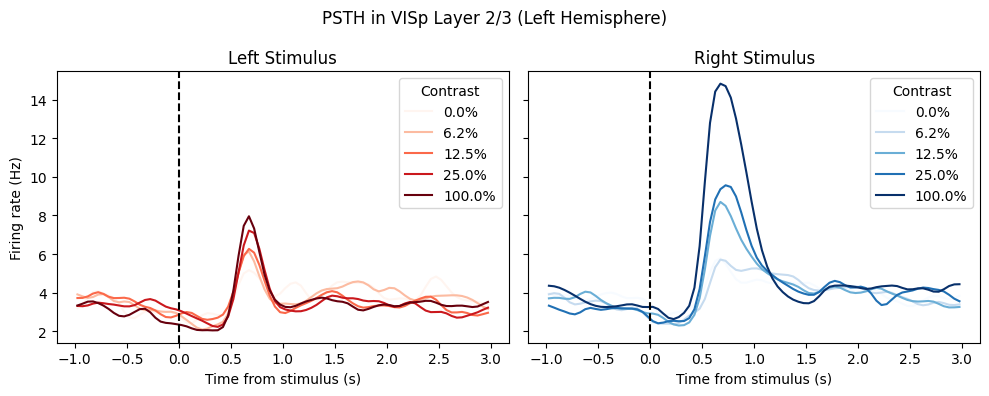

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

#  - spike_raster_all.shape = (nClusters, nTrials, nBins)
#  - times.shape = (nBins,)  # binning된 시간 축
#  - left_idx, right_idx: Boolean 배열 (Left/Right stimulus 존재여부)
#  - sl.trials['contrastLeft'], sl.trials['contrastRight']: trial별 contrast 값
#    [0.0, 0.0625, 0.125, 0.25, 1.0] 등

# 1) Contrast 목록 추출
contrasts_left = np.unique(sl.trials['contrastLeft'][left_idx])     # ex) [0.0, 0.0625, 0.125, 0.25, 1.0]
contrasts_right = np.unique(sl.trials['contrastRight'][right_idx])  # 보통 동일

# 2) Contrast별 PSTH 계산 (Left/Right)
#    - 뉴런(nClusters)과 trial 각각 평균 후 Gaussian smoothing
psth_list_left = []
for c in contrasts_left:
    trial_mask = left_idx & (sl.trials['contrastLeft'] == c)
    # PSTH 계산: (nClusters, trial_mask, nBins) -> mean -> (nBins,)
    psth_tmp = np.nanmean(spike_raster_all[:, trial_mask, :], axis=(0,1))
    # 가우시안 스무딩
    psth_smooth = gaussian_filter1d(psth_tmp, sigma=1.5)
    psth_list_left.append(psth_smooth)

psth_list_right = []
for c in contrasts_right:
    trial_mask = right_idx & (sl.trials['contrastRight'] == c)
    psth_tmp = np.nanmean(spike_raster_all[:, trial_mask, :], axis=(0,1))
    psth_smooth = gaussian_filter1d(psth_tmp, sigma=1.5)
    psth_list_right.append(psth_smooth)


# 4) 시각화: 2개의 서브플롯(왼: Left stimulus / 오른: Right stimulus)
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
fig.suptitle('PSTH in VISp Layer 2/3 (Left Hemisphere)')

# (4-1) Left stimulus subplot
#     contrast가 커질수록 붉은색 계열로 더 진하게 변하도록
for i, c in enumerate(contrasts_left):
    # 0 ~ 1 사이로 정규화해 colormap에 전달
    color_val = i / (len(contrasts_left) - 1) if len(contrasts_left) > 1 else 1.0
    color = plt.cm.Reds(color_val)  # Reds 컬러맵에서 밝은 빨강 ~ 진한 빨강
    axs[0].plot(times, psth_list_left[i], label=f'{c*100:.1f}%', c=color)

axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus (s)')
axs[0].set_ylabel('Firing rate (Hz)')
axs[0].set_title('Left Stimulus')
axs[0].legend(title='Contrast', loc='best')

# (4-2) Right stimulus subplot
for i, c in enumerate(contrasts_right):
    color_val = i / (len(contrasts_right) - 1) if len(contrasts_right) > 1 else 1.0
    color = plt.cm.Blues(color_val)  # Blues 컬러맵
    axs[1].plot(times, psth_list_right[i], label=f'{c*100:.1f}%', c=color)

axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus (s)')
axs[1].set_title('Right Stimulus')
axs[1].legend(title='Contrast', loc='best')

plt.tight_layout()
plt.show()


# FAQ



Where can I find out more information about the IBL?
- [IBL website](https://www.internationalbrainlab.com/)

How can I easily explore the IBL data available?
- [IBL visualisation website](https://viz.internationalbrainlab.org/)

Where can I find more information about the Brain-wide map?
- [Brain-wide map technical paper](https://figshare.com/articles/preprint/Data_release_-_Brainwide_map_-_Q4_2022/21400815)

Where can I find out more information about available dataset releases?
- [Publically available IBL data](https://int-brain-lab.github.io/iblenv/public_docs/public_introduction.html)

Where can I read more about the science conducted in the IBL?
- [List of publications](https://www.internationalbrainlab.com/publications)

Where can I find out more information about ONE?
- [ONE documentation](https://int-brain-lab.github.io/ONE/)

Where can I find out more information about ibllib and brainbox?
- [ibllib documentation](https://int-brain-lab.github.io/iblenv/010_api_reference.html)

Where can I find out more information about iblatlas?
- [Atlas examples](https://int-brain-lab.github.io/iblenv/atlas_examples.html)

Where can I find out more information about different IBL datasets?
- [Description of public datasets](https://docs.google.com/document/d/1OqIqqakPakHXRAwceYLwFY9gOrm8_P62XIfCTnHwstg/edit#heading=h.hnjqyfnroyya)

Where can I find help?
- Issues with the data? Post an issue here: https://neurostars.org/ with the tag `ibl`
- Alternatively post an issue here: https://github.com/int-brain-lab/iblenv/issues
- General questions about the datasets or publications? Email: info@internationalbrainlab.org

